# 다항회귀

## 다항식 특성으로 변환

In [4]:
# sampel [[0,1][2, 3]] 변환 연습
import numpy as np

X = np.arange(4).reshape(-1,2) # 0부터 4보다 작은 범위까지
X

array([[0, 1],
       [2, 3]])

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [9]:
poly.fit(X)
X_poly = poly.transform(X) # poly.fit_trainsform(X)으로 한 줄로 쓰기도 함.
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [11]:
# 어떤 항(특성)이 곱해지는지(만들어지는지) 알고 싶을 때
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

## 사이킷런으로 다항 회귀 분석

In [ ]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

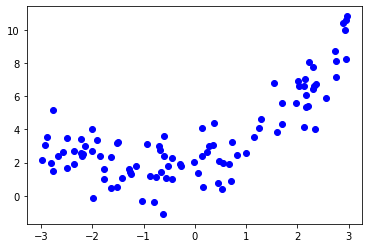

In [16]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100,1) - 3 # (0~1 사이에 100개 난수 생성)*6 - 3라서 -3부터 3까지 100개
y = 0.5 * X **2 + X + 2 + np.random.randn(100,1)

plt.scatter(X, y, color='blue')
plt.show()

In [ ]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

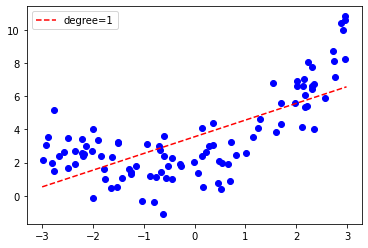

In [17]:
from sklearn.linear_model import LinearRegression

X1_train = X # 1차 함수
y_train = y

reg1 = LinearRegression().fit(X1_train, y_train)

xx = np.arange(-3, 3, 0.01)[:, np.newaxis] # 새로운 축을 하나 더 쌓아서 차원을 높여줌. 원래 있던 배열을 변경시켜줌.
yy = reg1.predict(xx)
plt.plot(xx, yy, color='r', linestyle='--', label='degree=1')
plt.scatter(X, y, color='b')
plt.legend()

plt.show()

In [ ]:
# 3) 2차항 형태로 다항 회귀 수행

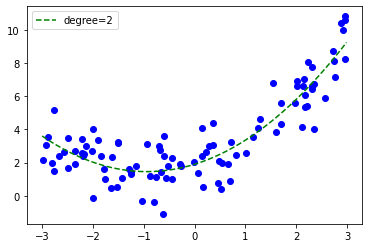

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X2_train = poly.fit_transform(X)
y_train = y

reg2 = LinearRegression().fit(X2_train, y_train)

xx = np.arange(-3, 3, 0.01)
yy = reg2.predict(poly.transform(xx[:, np.newaxis]))

plt.plot(xx, yy, color='g', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b')
plt.legend()
plt.show()

In [ ]:
# 구해진 2차식의 계수 확인

In [22]:
reg2.intercept_, reg2.coef_

(array([1.89714129]), array([[0.        , 0.9463679 , 0.50425811]]))

In [ ]:
# 4) 7차항 형태로 다항회귀 수행

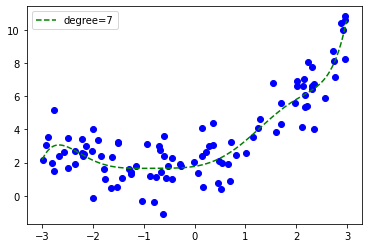

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7) # 여러 특성 적용하기 위하여 변환

X7_train = poly.fit_transform(X) # 데이터 전부인 X을 적용
y_train = y

reg2 = LinearRegression().fit(X7_train, y_train)

xx = np.arange(-3, 3, 0.01)
yy = reg2.predict(poly.transform(xx[:, np.newaxis]))

plt.plot(xx, yy, color='g', linestyle='--', label='degree=7')
plt.scatter(X, y, color='b')
plt.legend()
plt.show()

In [ ]:
# 여러 형태의 시각화 그래프 비교

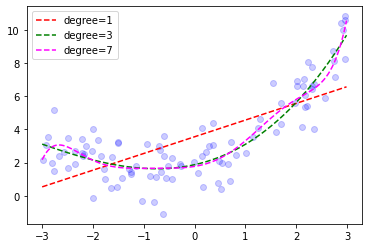

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['red', 'green', 'magenta']

plt.scatter(X, y, color='b', alpha=0.2) # alpha는 투명도

for i, d in enumerate(degree):
    poly = PolynomialFeatures(degree=d) # 여러 특성 적용하기 위하여 변환
    X_train = poly.fit_transform(X) # 데이터 전부인 X을 적용
    y_train = y

    reg2 = LinearRegression().fit(X_train, y_train)
    xx = np.arange(-3, 3, 0.01)
    yy = reg2.predict(poly.transform(xx[:, np.newaxis]))
    
    plt.plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    plt.legend()
plt.show()

# pipeline을 활용한 다항회귀

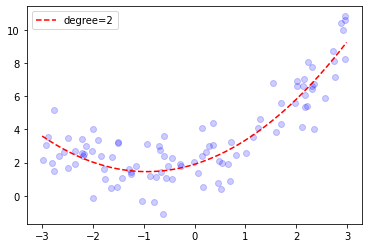

In [33]:
# 1) degree=2인 모델
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, y)
xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
yy = reg.predict(xx)
    
plt.plot(xx, yy, color='r', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b', alpha=0.2)
plt.legend()
plt.show()

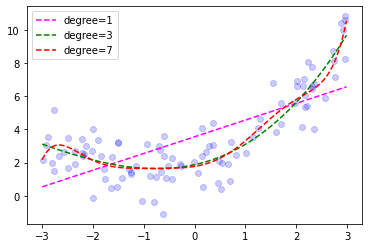

In [36]:
# 2) degree = [1, 3, 7]인 모델을 파이프라인으로 변환- 추정 통합
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['magenta', 'green', 'red']

plt.scatter(X, y, color='b', alpha=0.2) # alpha는 투명도

for i, d in enumerate(degree):
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)

    xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
    yy = reg.predict(xx)
    
    plt.plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    plt.legend()
plt.show()

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

#### 데이터 수집

In [ ]:
import 

In [37]:
boston = load_boston()

NameError: name 'load_boston' is not defined

#### 데이터 이해

In [ ]:
#boston.DESCR
print(boston.feature_names)

#### 데이터 준비

In [ ]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [ ]:
# 데이터프레임 확인


In [ ]:
# 학습용, 검증용 데이터 분할


#### 모델 구축

In [ ]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
# 방의 갯수 최대값, 최소값

In [ ]:
#원본 데이터 단순 회귀


In [ ]:
# 아래 셀에 있는 '???'를 지우고 본인이 작성한 코드를 입력

In [ ]:
# 2차식의 다항회귀
X2_train = ???
X2_test = ???

reg2 = ???
y_pred2 = ???

print(reg2.coef_, reg2.intercept_)

xx2 = ???
yy2 = ???

In [ ]:
# 3차식의 다항회귀
X3_train = ???
X3_test = ???

reg3 = ???
y_pred3 = ???

print(reg3.coef_, reg3.intercept_)

xx3 = ???
yy3 = ???


####  다항 회귀 시각화

#### 모델 성능 평가

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
print(pd.Series(data))


# [실습2] 당뇨병 진행도

(회귀분석 공지사항)